In [1]:
#Plotting resulting mode weights
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math 
import SVBfunc
from scipy.io import loadmat
from os.path import exists
import pylab as pl

In [2]:
corrinds=[30.49,30.77,31.13,31.69,32.11,32.65,33.02]
VAR=['PHIHYD','VVEL','UVEL','WVEL']
FILT=['no','filt']

filt=FILT[1]
var=VAR[0]
ds=[]
Bs=[]
p=0

for lat in corrinds:
    ds.append(xr.open_dataset(str(var)+'/LinReg' + str(lat) + str(filt)+ '.nc'))
    betain=np.zeros((len(ds[0].time.values),15))
    k=0
    for l in np.arange(1,15,1):
        if exists('Matlab/PerpendicularCrossections/dataSVB'+ str(lat) +'mode' + str(l) + '.mat') == True:
            k=k+1
            betain[:,l]=ds[p].betas[:,k].values
    Bs.append(betain)
    p=p+1

In [3]:
indexs=ds[0].time.values>=172800
TIME=ds[0].time.values[indexs]

betas=[ds[0].betas.values[indexs],ds[1].betas.values[indexs]]
betas2=[ds[2].betas.values[indexs],ds[3].betas.values[indexs]]
betas3=[ds[4].betas.values[indexs],ds[5].betas.values[indexs], ds[6].betas.values[indexs]]

exp1=math.floor(math.log(abs(betas[0][0,1]), 10))
exp2=math.floor(math.log(abs(betas2[0][0,1]), 10))
exp3=math.floor(math.log(abs(betas3[0][0,1]), 10))

In [4]:
params = {'font.size': 16,
          'figure.figsize': (11, 12),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

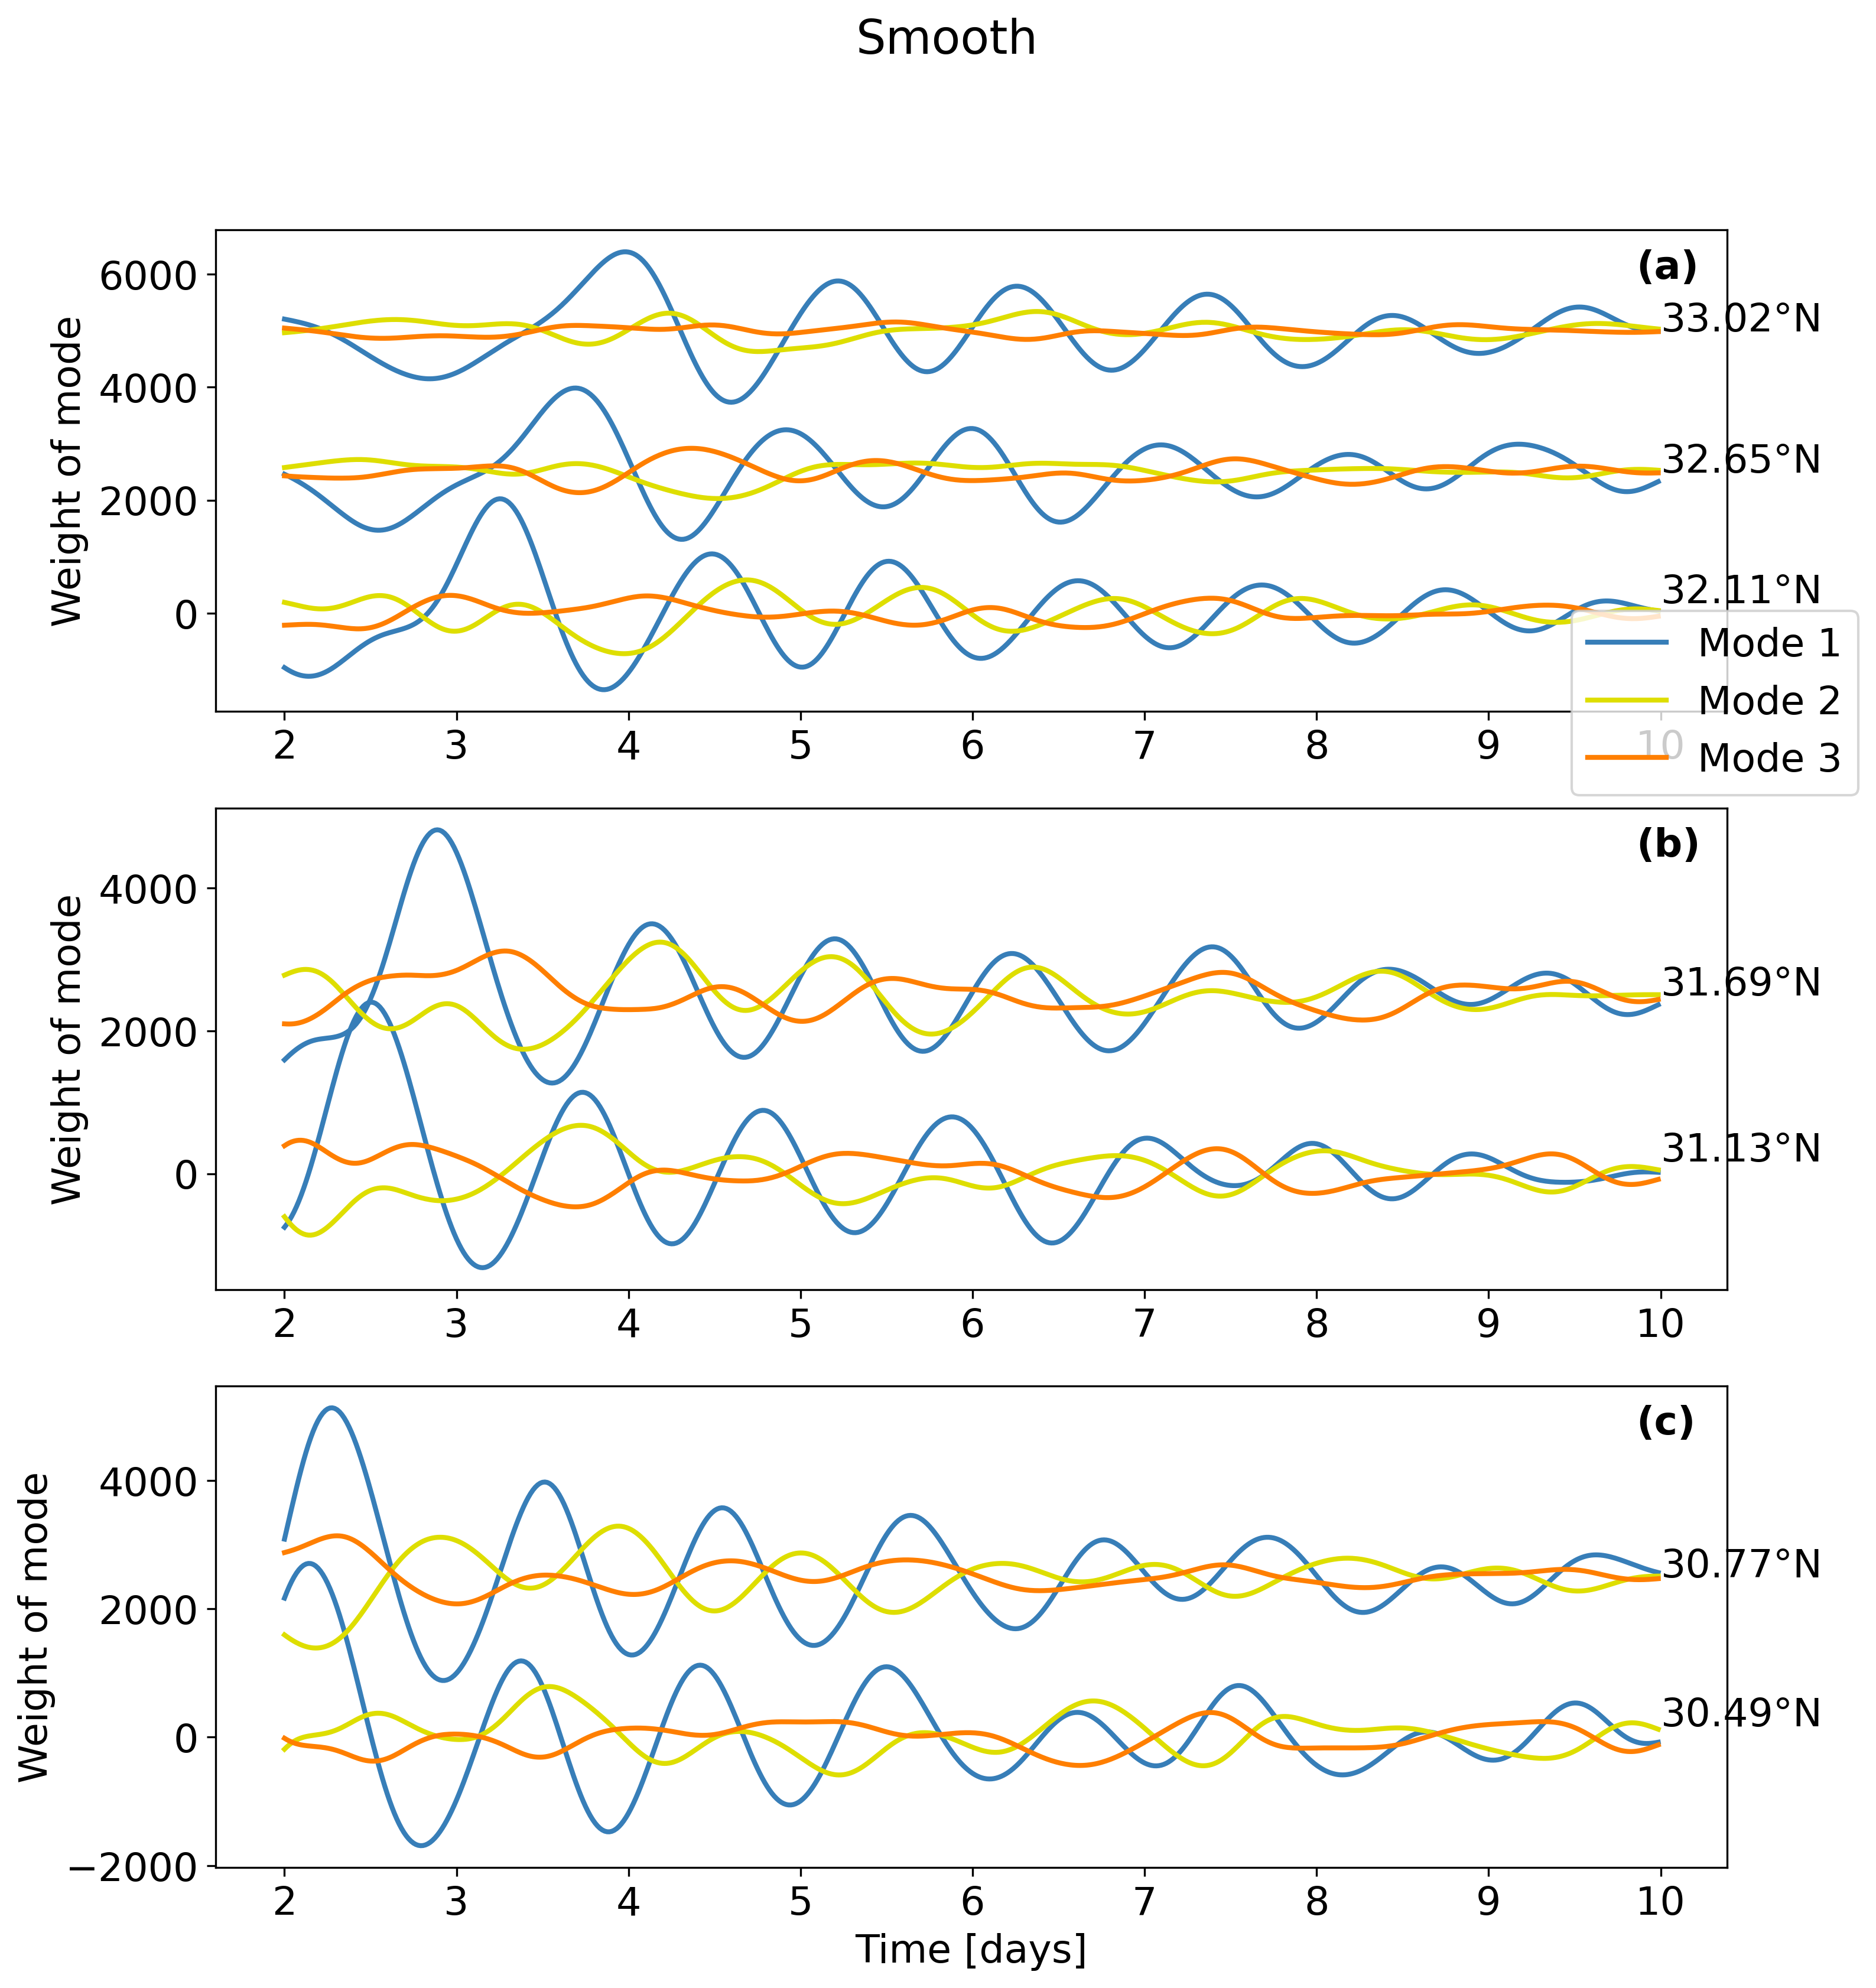

In [5]:
exp3=2
exp1=2
exp2=2

xlab='Time [days]'
ylab='Weight of mode'

colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(1,4,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(Bs[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*60*24),Bs[l+4][indexs,i], color=colors[i-1],linewidth=2)
            if np.all(Bs[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*60*24),Bs[l+2][indexs,i], color=colors[i-1],linewidth=2)
            if np.all(Bs[l][:,i]!=0):
                ax[2].plot(TIME/(60*60*24),Bs[l][indexs,i], color=colors[i-1],linewidth=2)
        elif l==1:
            if np.all(Bs[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*60*24),Bs[l+4][indexs,i]+l*(50**(exp3)), color=colors[i-1],linewidth=2)            
            if np.all(Bs[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*60*24),Bs[l+2][indexs,i]+l*(50**(exp2)), color=colors[i-1], label=f'Mode {i}', linewidth=2)
            if np.all(Bs[l][:,i]!=0):
                ax[2].plot(TIME/(60*60*24),Bs[l][indexs,i]+l*(50**(exp1)), color=colors[i-1],linewidth=2)
        elif l==2:
            if np.all(Bs[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*60*24),Bs[l+4][indexs,i]+l*(50**(exp3)), color=colors[i-1], linewidth=2)  

#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,180))
ax[0].annotate(str(corrinds[5])+'°N', (10,(50**(exp3))))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*50**(exp3))))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,180))
ax[1].annotate(str(corrinds[3])+'°N', (10,(50**(exp2))))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set( ylabel=ylab)

ax[2].annotate(str(corrinds[0])+'°N', (10,180))
ax[2].annotate(str(corrinds[1])+'°N', (10,(50**(exp1))))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.1, 1.45))

plt.suptitle('Smooth')
plt.show()

fig.tight_layout()


In [6]:
corrinds=[30.49,30.77,31.13,31.69,32.11,32.65,33.02]
VAR=['PHIHYD2023','VVEL2023','UVEL2023','WVEL2023']
FILT=['no','filt']

filt=FILT[1]
var=VAR[0]
ds=[]
B=[]
p=0

for lat in corrinds:
    ds.append(xr.open_dataset(str(var)+'/LinReg' + str(lat) + str(filt)+ '.nc'))
    betain=np.zeros((len(ds[0].time.values),15))
    k=0
    for l in np.arange(1,15,1):
        if exists('CrossectsPerp/dataSVB'+ str(lat) +'mode' + str(l) + '.mat') == True:
            k=k+1
            betain[:,l]=ds[p].betas[:,k].values
    B.append(betain)
    p=p+1

In [7]:

TIME=ds[0].time.values

betas=[ds[0].betas.values,ds[1].betas.values]
betas2=[ds[2].betas.values,ds[3].betas.values]
betas3=[ds[4].betas.values,ds[5].betas.values, ds[6].betas.values]

exp1=math.floor(math.log(abs(betas[0][0,1]), 10))
exp2=math.floor(math.log(abs(betas2[0][0,1]), 10))
exp3=math.floor(math.log(abs(betas3[0][0,1]), 10))

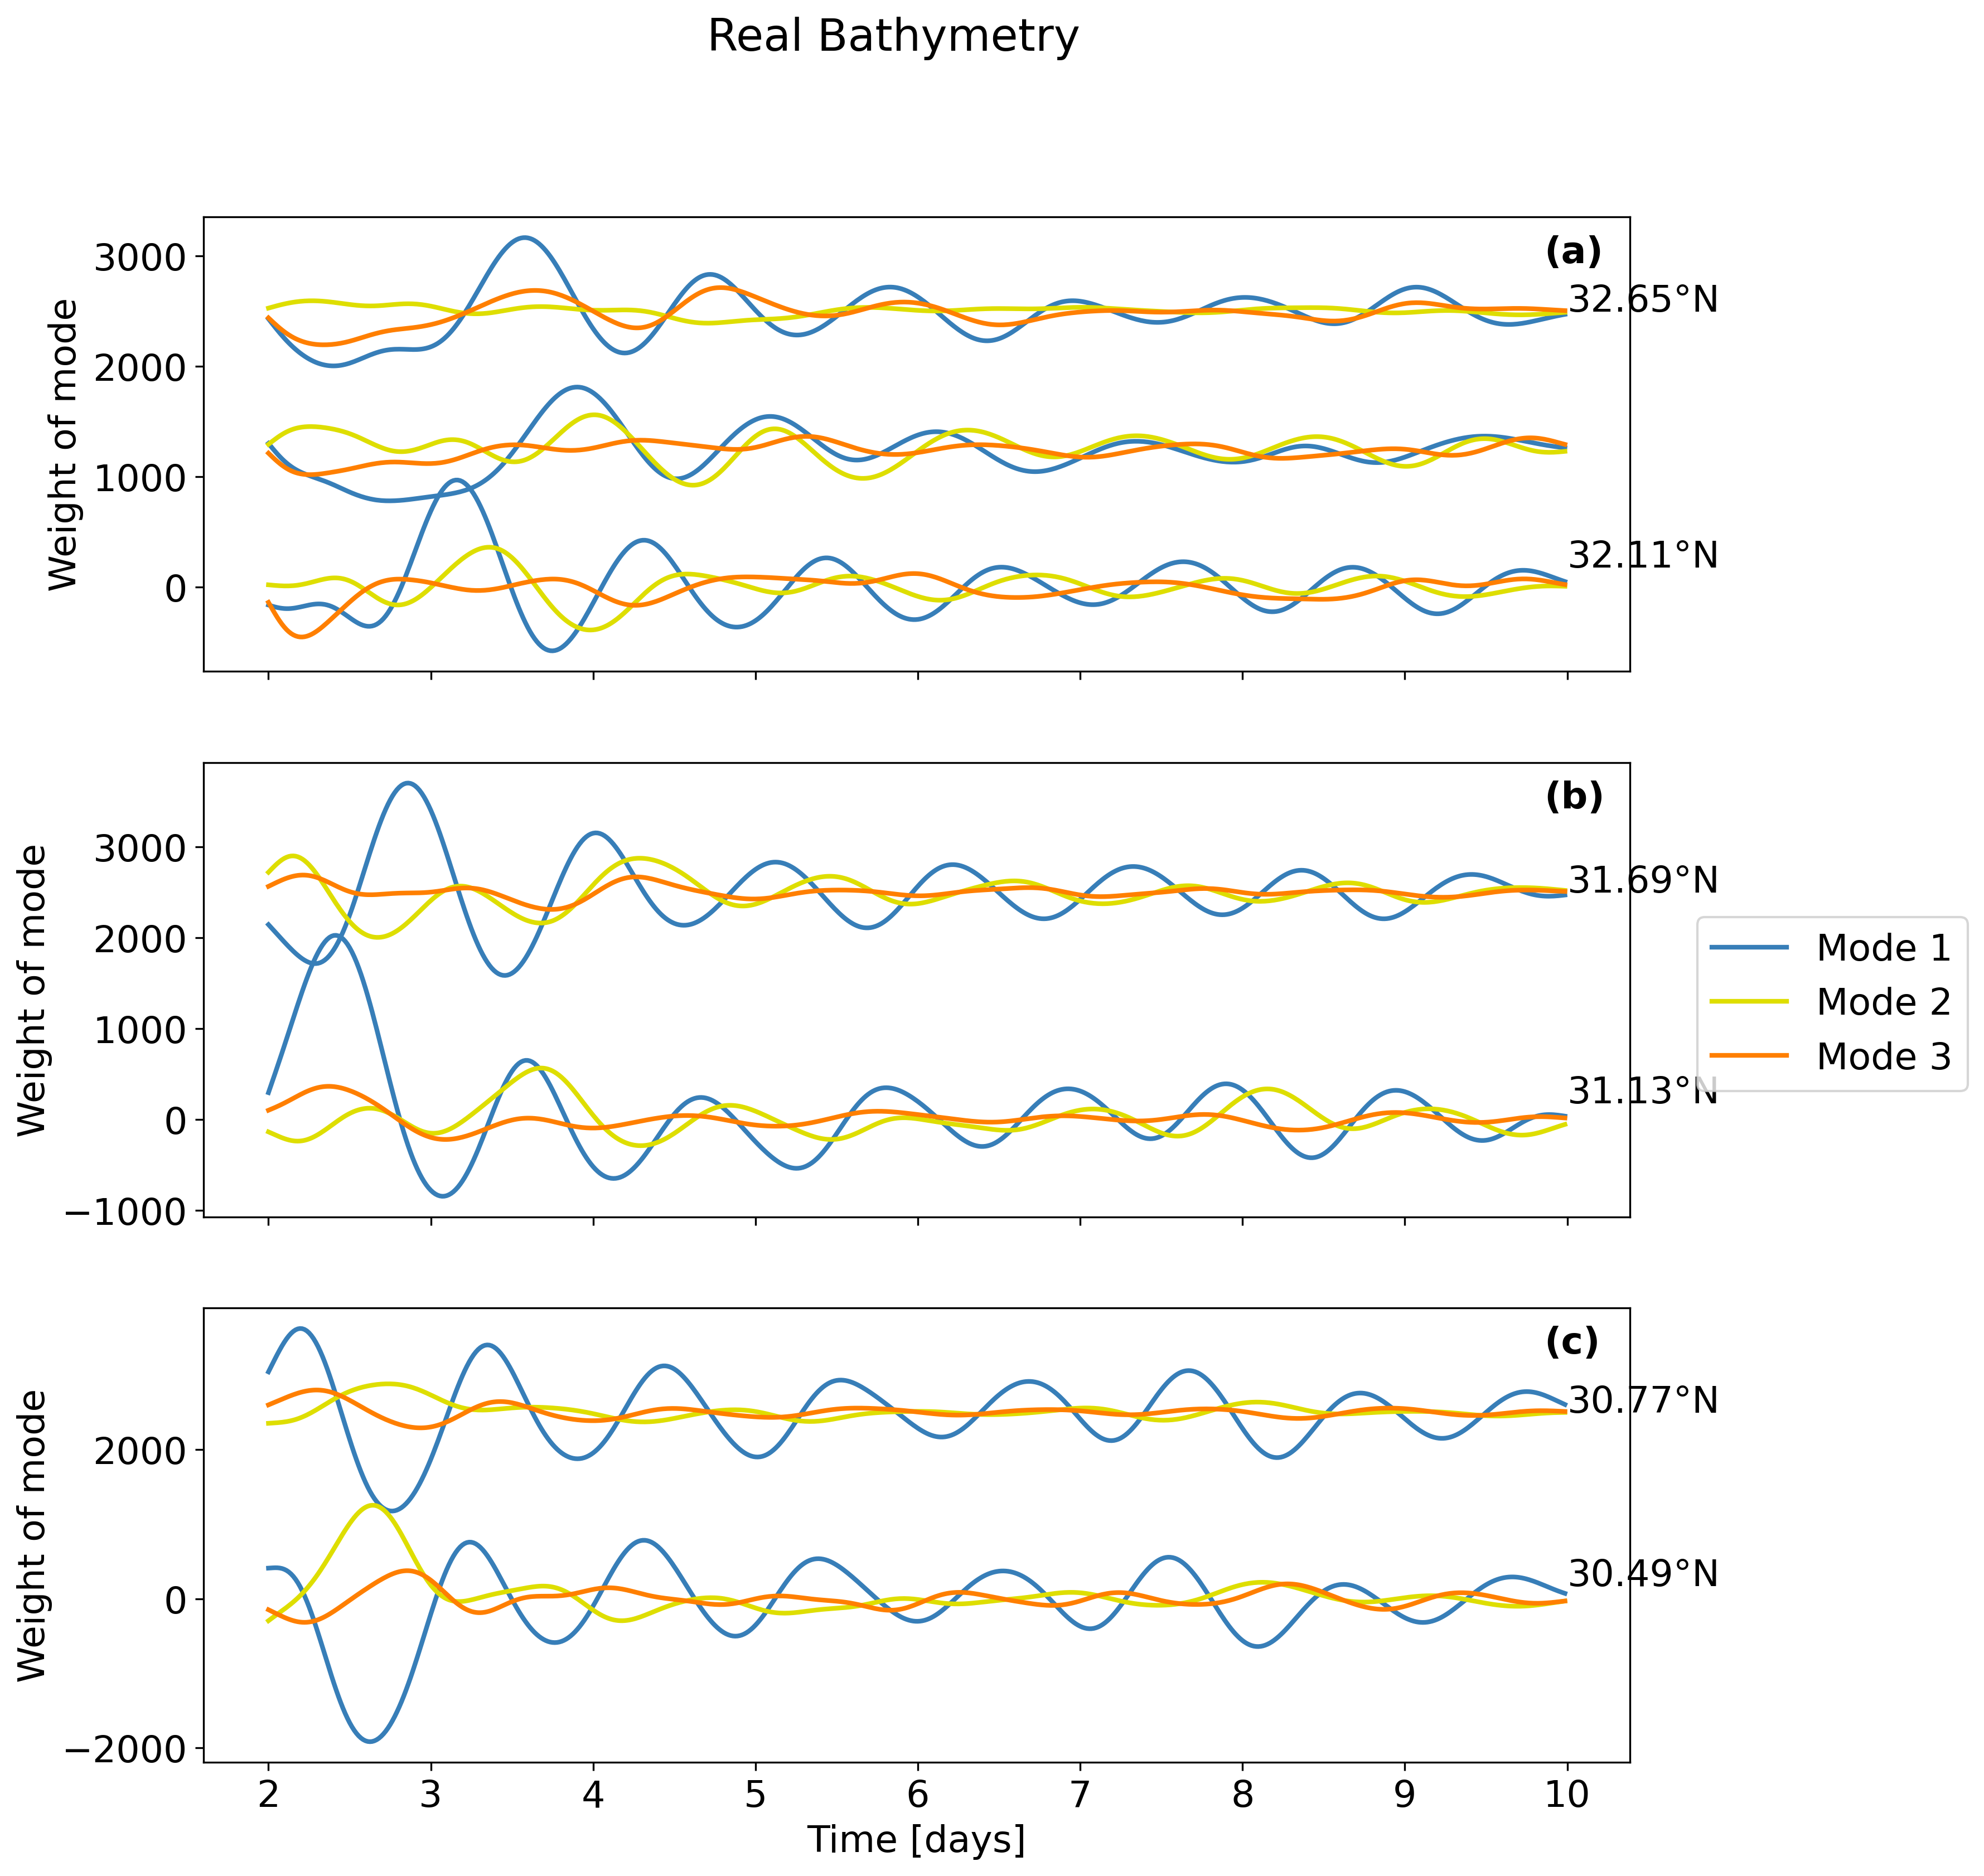

In [8]:
xlab='Time [days]'
ylab='Weight of mode'

colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(1,4,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),B[l+4][:,i], color=colors[i-1],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),B[l+2][:,i], color=colors[i-1],linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),B[l][:,i], color=colors[i-1],linewidth=2)
        elif l==1:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),B[l+4][:,i]+l*(50**(exp3)), color=colors[i-1],linewidth=2)            
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),B[l+2][:,i]+l*(50**(exp2)), color=colors[i-1],label=f'Mode {i}', linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),B[l][:,i]+l*(50**(exp1)), color=colors[i-1],linewidth=2)
        elif l==2:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),B[l+4][:,i]+l*(25**(exp3)), color=colors[i-1], linewidth=2)  

#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,180))
ax[0].annotate(str(corrinds[5])+'°N', (10,(50**(exp3))))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*50**(exp3))))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,180))
ax[1].annotate(str(corrinds[3])+'°N', (10,(50**(exp2))))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(ylabel=ylab)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off


ax[2].annotate(str(corrinds[0])+'°N', (10,180))
ax[2].annotate(str(corrinds[1])+'°N', (10,(50**(exp1))))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.25, 0.7))

plt.suptitle('Real Bathymetry')
plt.show()


fig.tight_layout()


In [14]:
np.mean(Bs[l+4][indexs,i]-B[l+4][:,i])

10.336350256666343

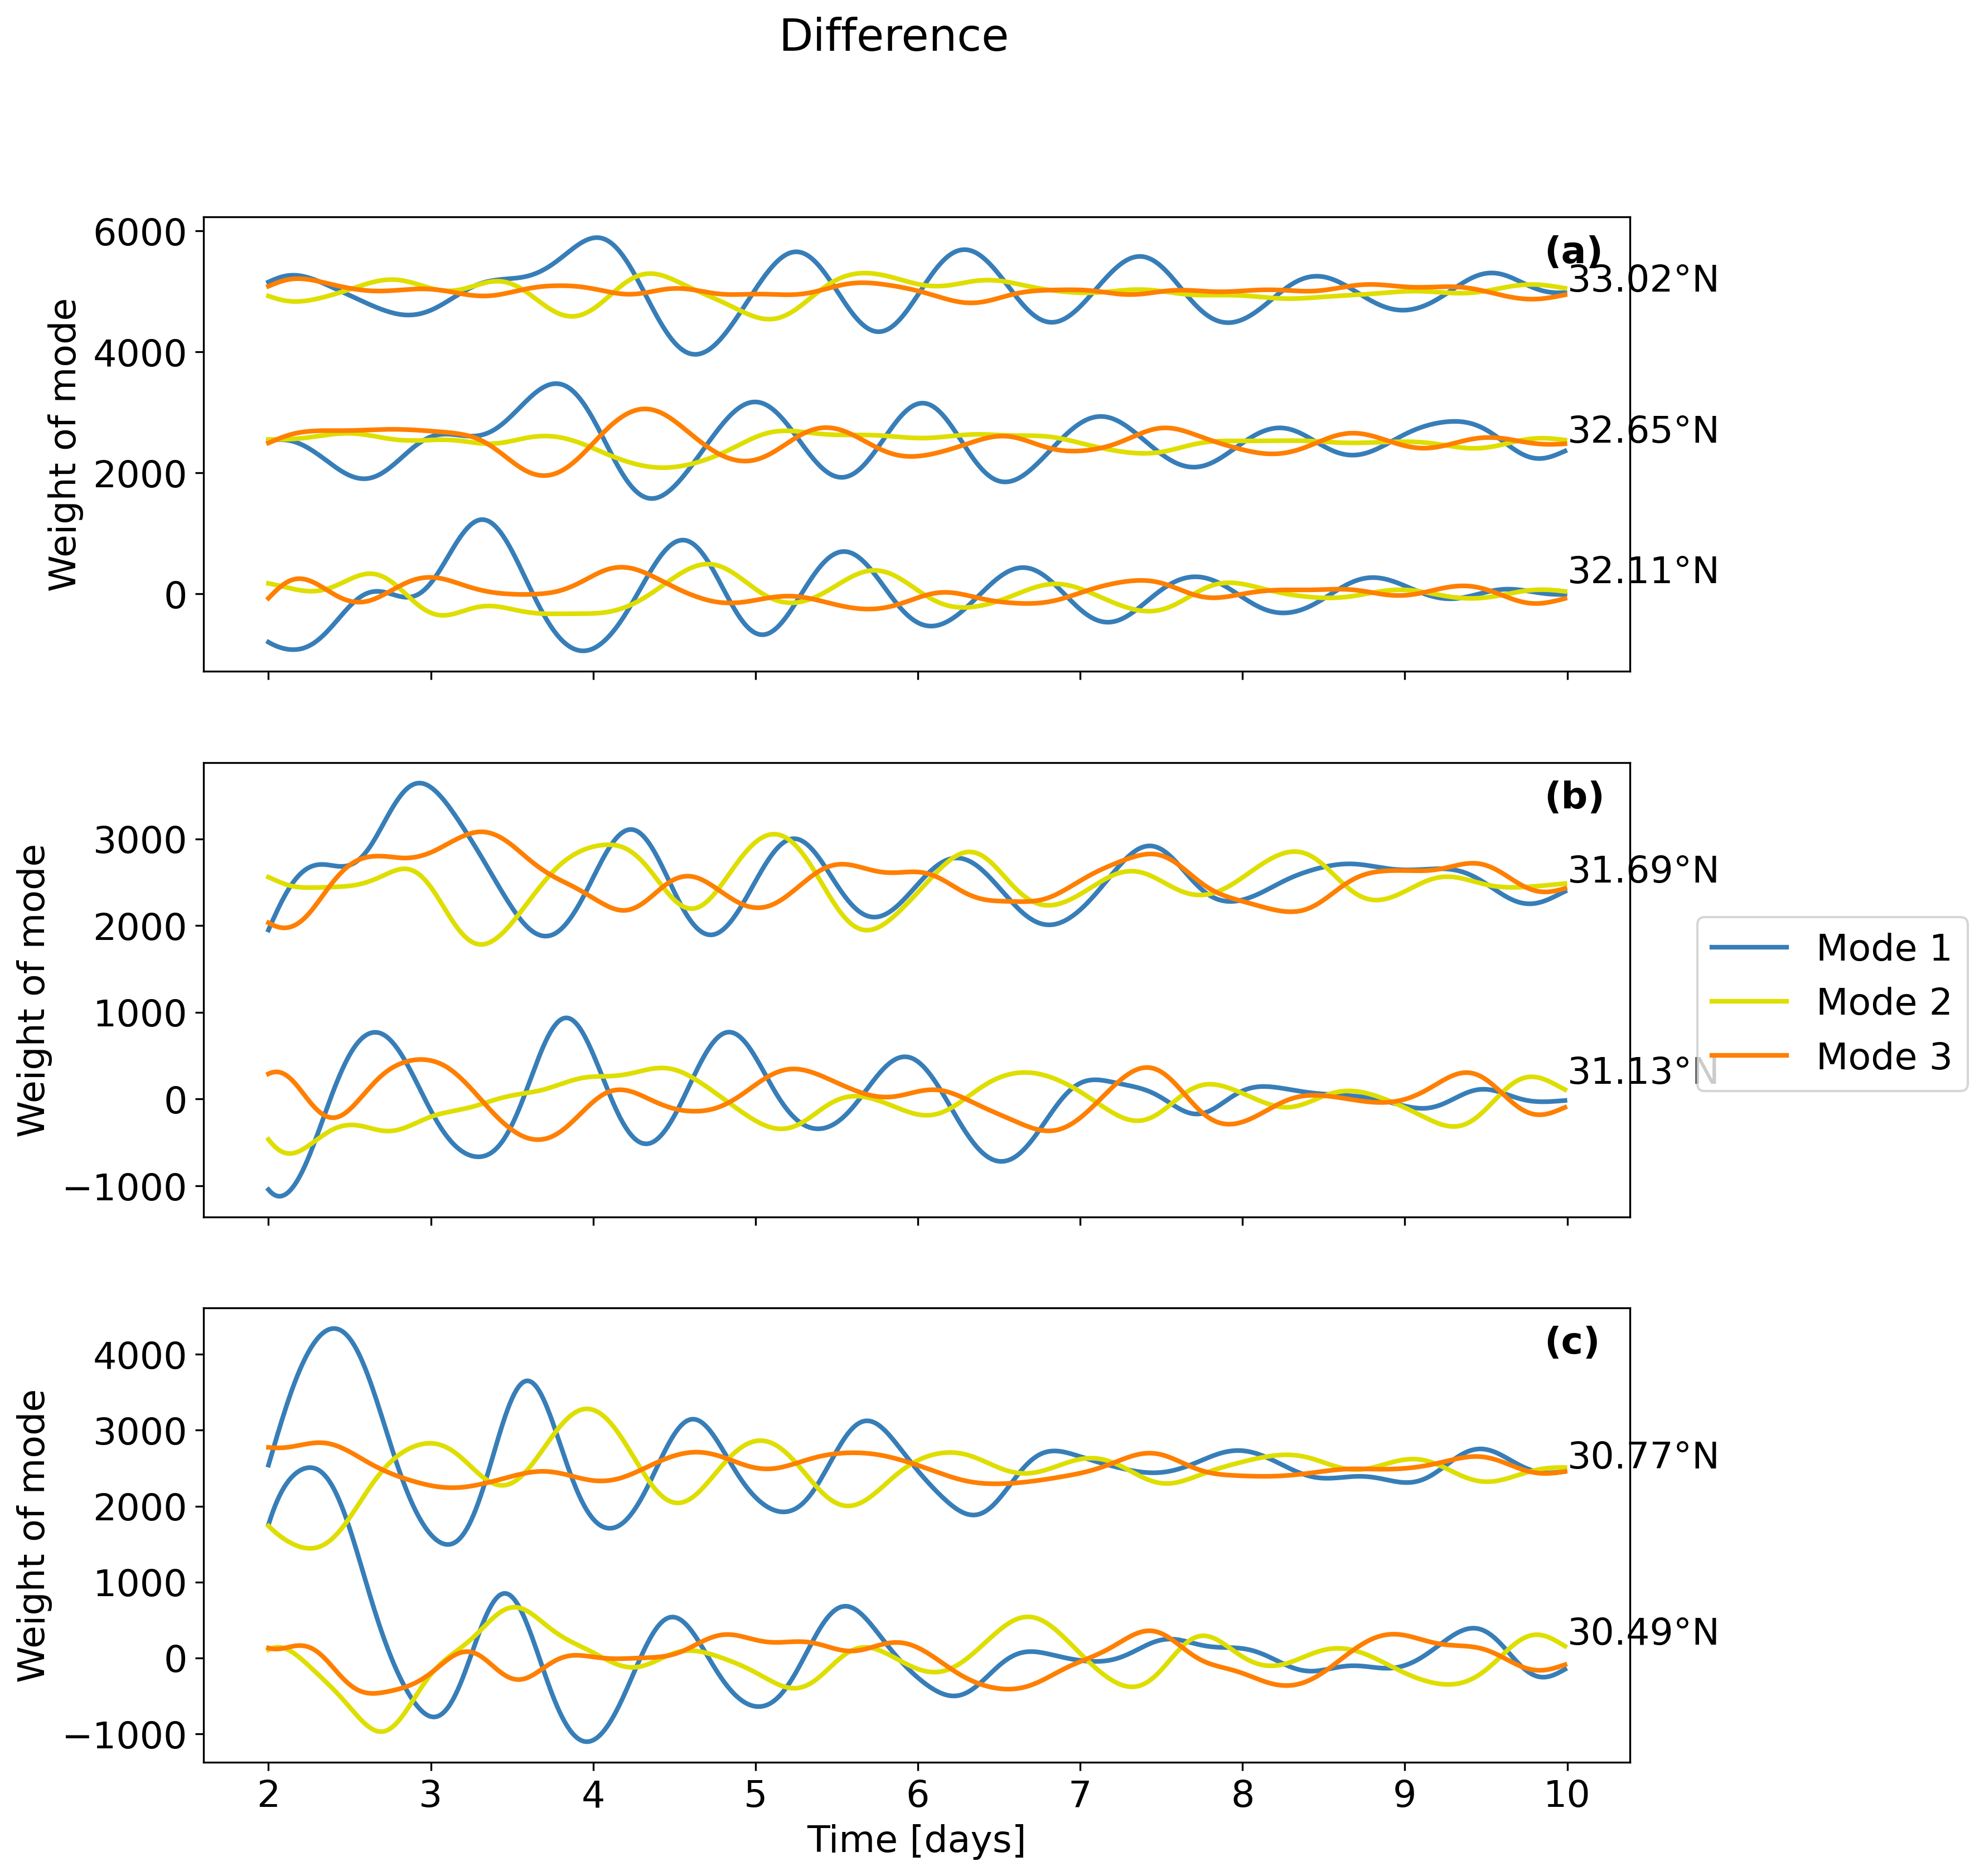

In [17]:
xlab='Time [days]'
ylab='Weight of mode'

colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(1,4,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),Bs[l+4][indexs,i]-B[l+4][:,i], color=colors[i-1],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),Bs[l+2][indexs,i]-B[l+2][:,i], color=colors[i-1],linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),Bs[l][indexs,i]-B[l][:,i], color=colors[i-1],linewidth=2)
        elif l==1:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i]-B[l+4][:,i])+l*(2500), color=colors[i-1],linewidth=2)            
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),(Bs[l+2][indexs,i]-B[l+2][:,i])+l*(2500), color=colors[i-1],label=f'Mode {i}', linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),(Bs[l][indexs,i]-B[l][:,i])+l*(2500), color=colors[i-1],linewidth=2)
        elif l==2:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i]-B[l+4][:,i])+l*(2500), color=colors[i-1], linewidth=2)  

#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,180))
ax[0].annotate(str(corrinds[5])+'°N', (10,(50**(exp3))))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*50**(exp3))))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,180))
ax[1].annotate(str(corrinds[3])+'°N', (10,(50**(exp2))))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(ylabel=ylab)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off


ax[2].annotate(str(corrinds[0])+'°N', (10,180))
ax[2].annotate(str(corrinds[1])+'°N', (10,(50**(exp1))))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.25, 0.7))

plt.suptitle('Difference')
plt.show()


fig.tight_layout()


In [30]:
params = {'font.size': 16,
          'figure.figsize': (11, 12),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

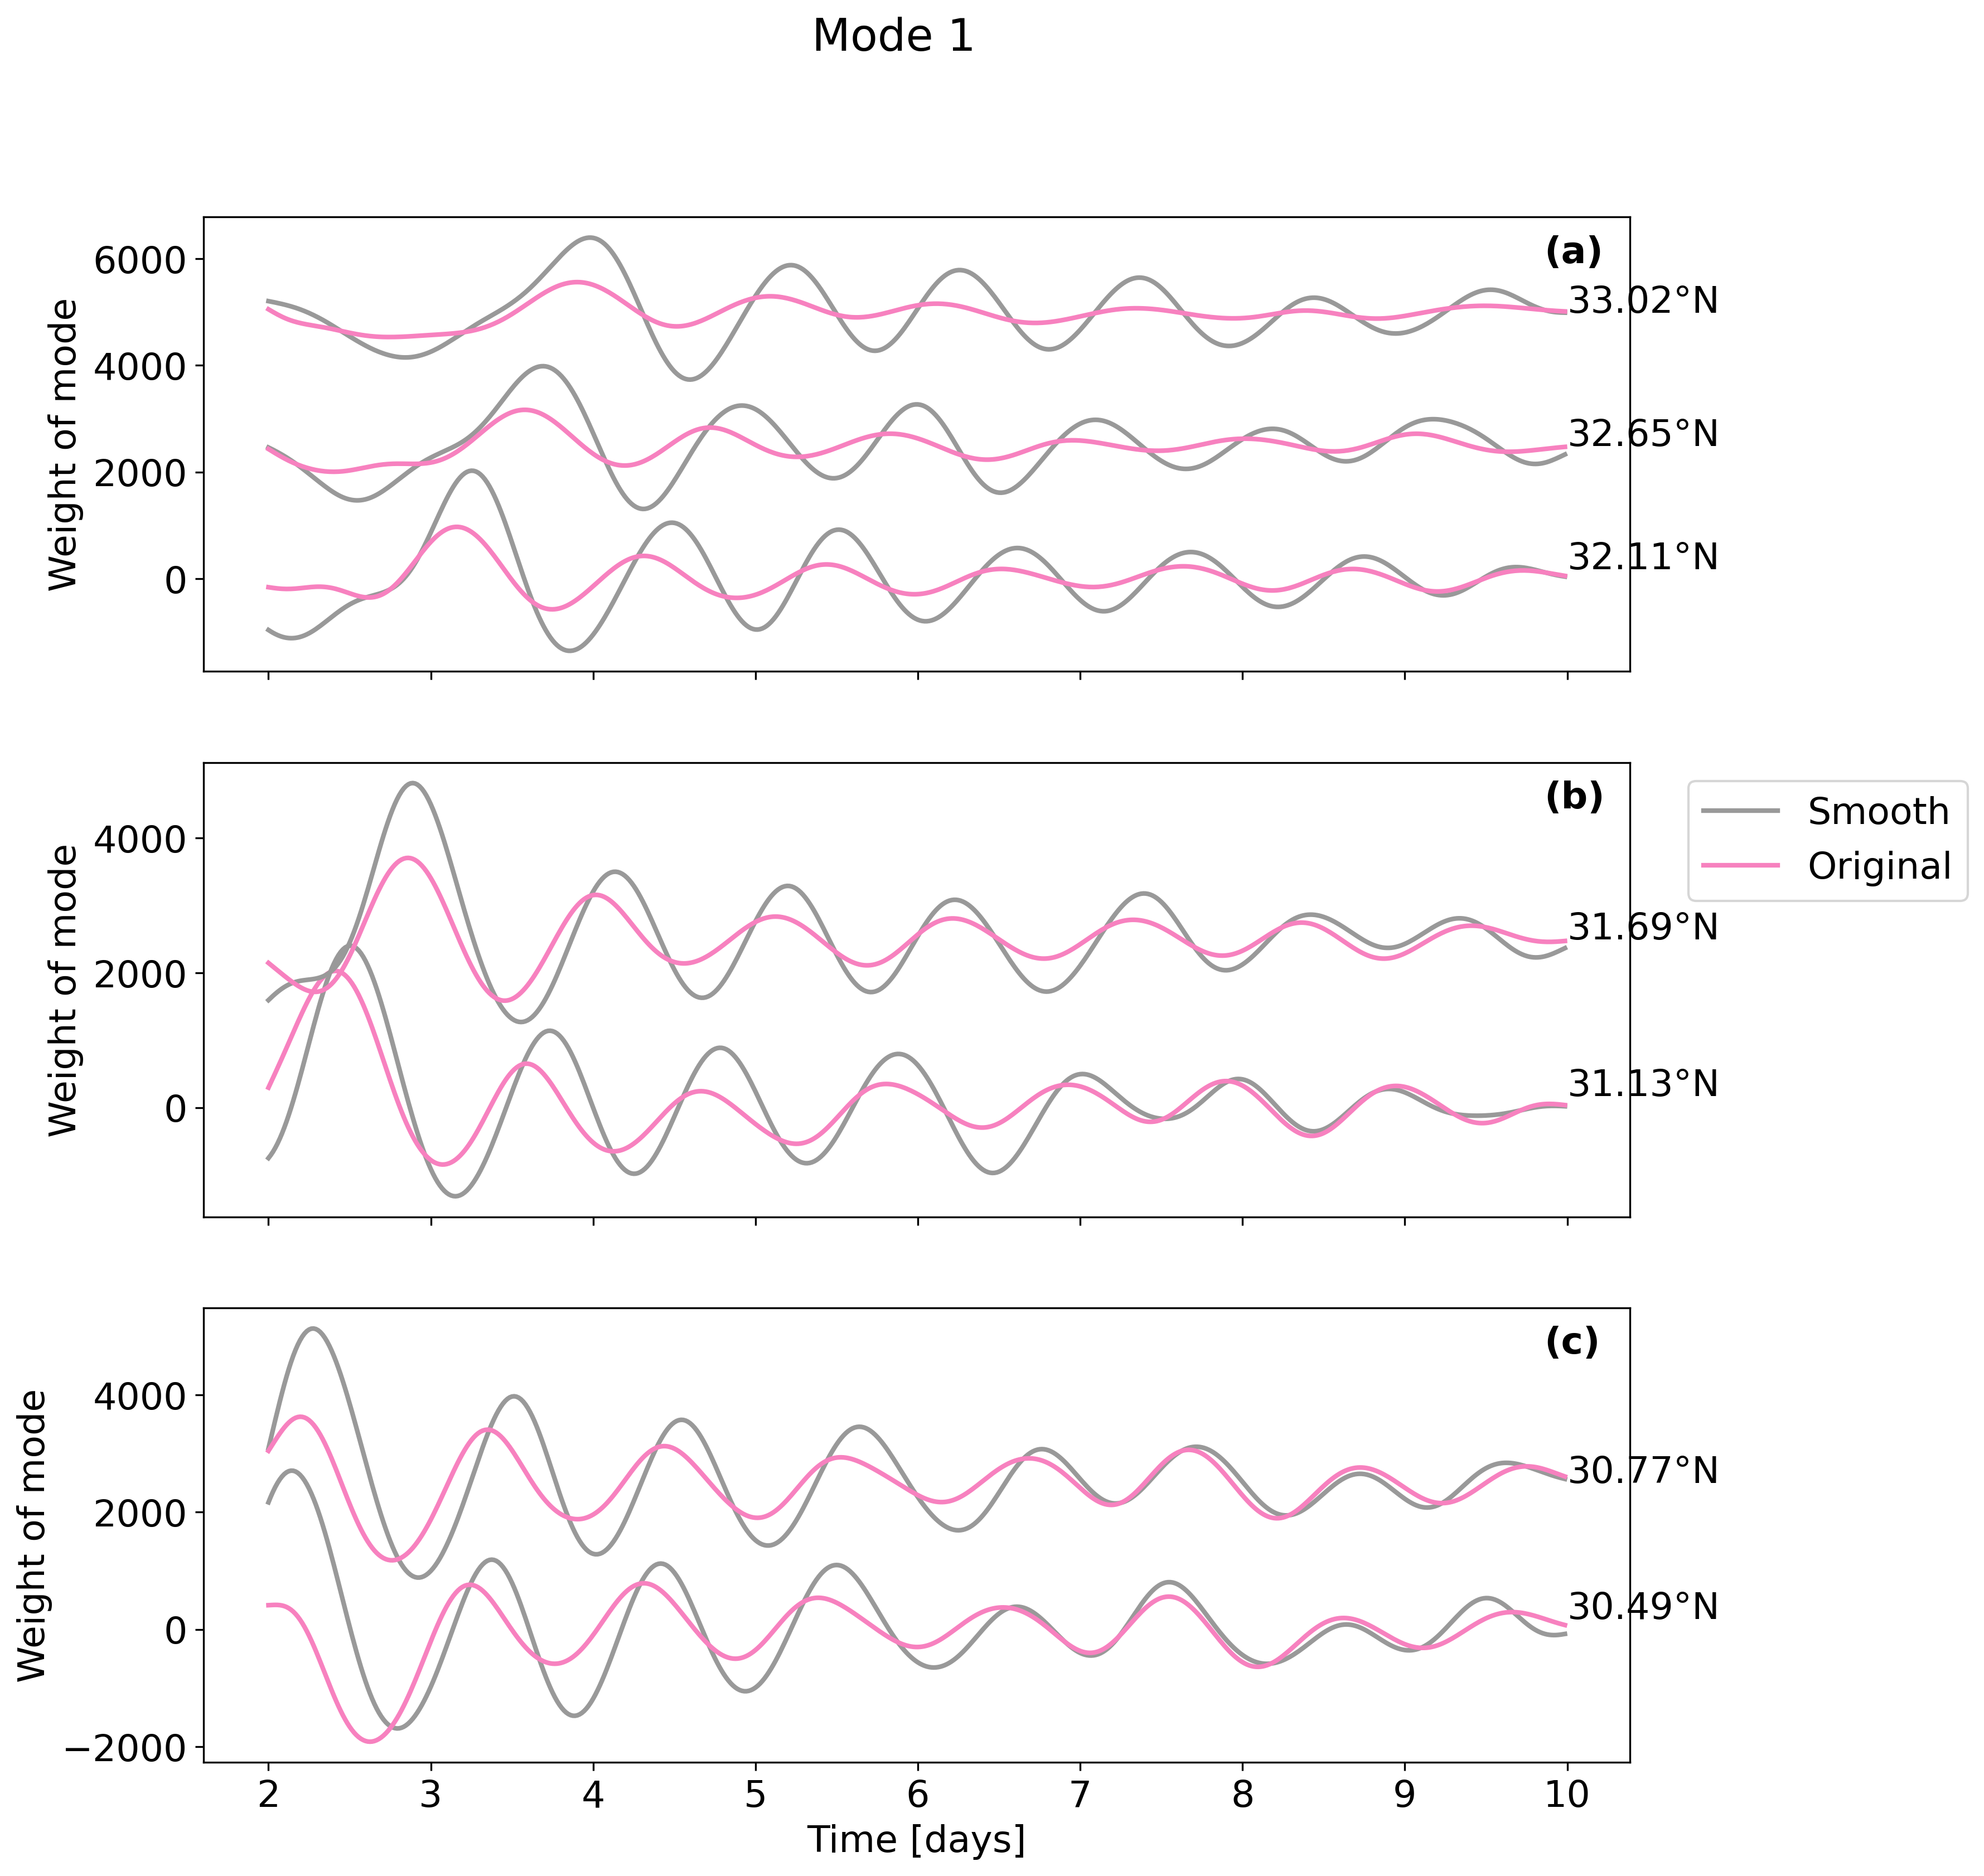

In [43]:
xlab='Time [days]'
ylab='Weight of mode'
p=3
colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(1,2,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),Bs[l+4][indexs,i], color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),B[l+4][:,i], color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),Bs[l+2][indexs,i], color=colors[p+1],linewidth=2)
                ax[1].plot(TIME/(60*24),B[l+2][:,i], color=colors[p],linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),Bs[l][indexs,i], color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),B[l][:,i], color=colors[p],linewidth=2)
        elif l==1:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(2500), color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(2500), color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),(Bs[l+2][indexs,i])+l*(2500), color=colors[p+1],label=f'Smooth', linewidth=2)
                ax[1].plot(TIME/(60*24),(B[l+2][:,i])+l*(2500), color=colors[p],label=f'Original', linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),(Bs[l][indexs,i])+l*(2500), color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),(B[l][:,i])+l*(2500), color=colors[p],linewidth=2)
        elif l==2:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(2500), color=colors[p+1], linewidth=2)  
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(2500), color=colors[p], linewidth=2) 
#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,180))
ax[0].annotate(str(corrinds[5])+'°N', (10,(50**(exp3))))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*50**(exp3))))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,180))
ax[1].annotate(str(corrinds[3])+'°N', (10,(50**(exp2))))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(ylabel=ylab)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off


ax[2].annotate(str(corrinds[0])+'°N', (10,180))
ax[2].annotate(str(corrinds[1])+'°N', (10,(50**(exp1))))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.25, 1))

plt.suptitle('Mode 1')
plt.show()


fig.tight_layout()


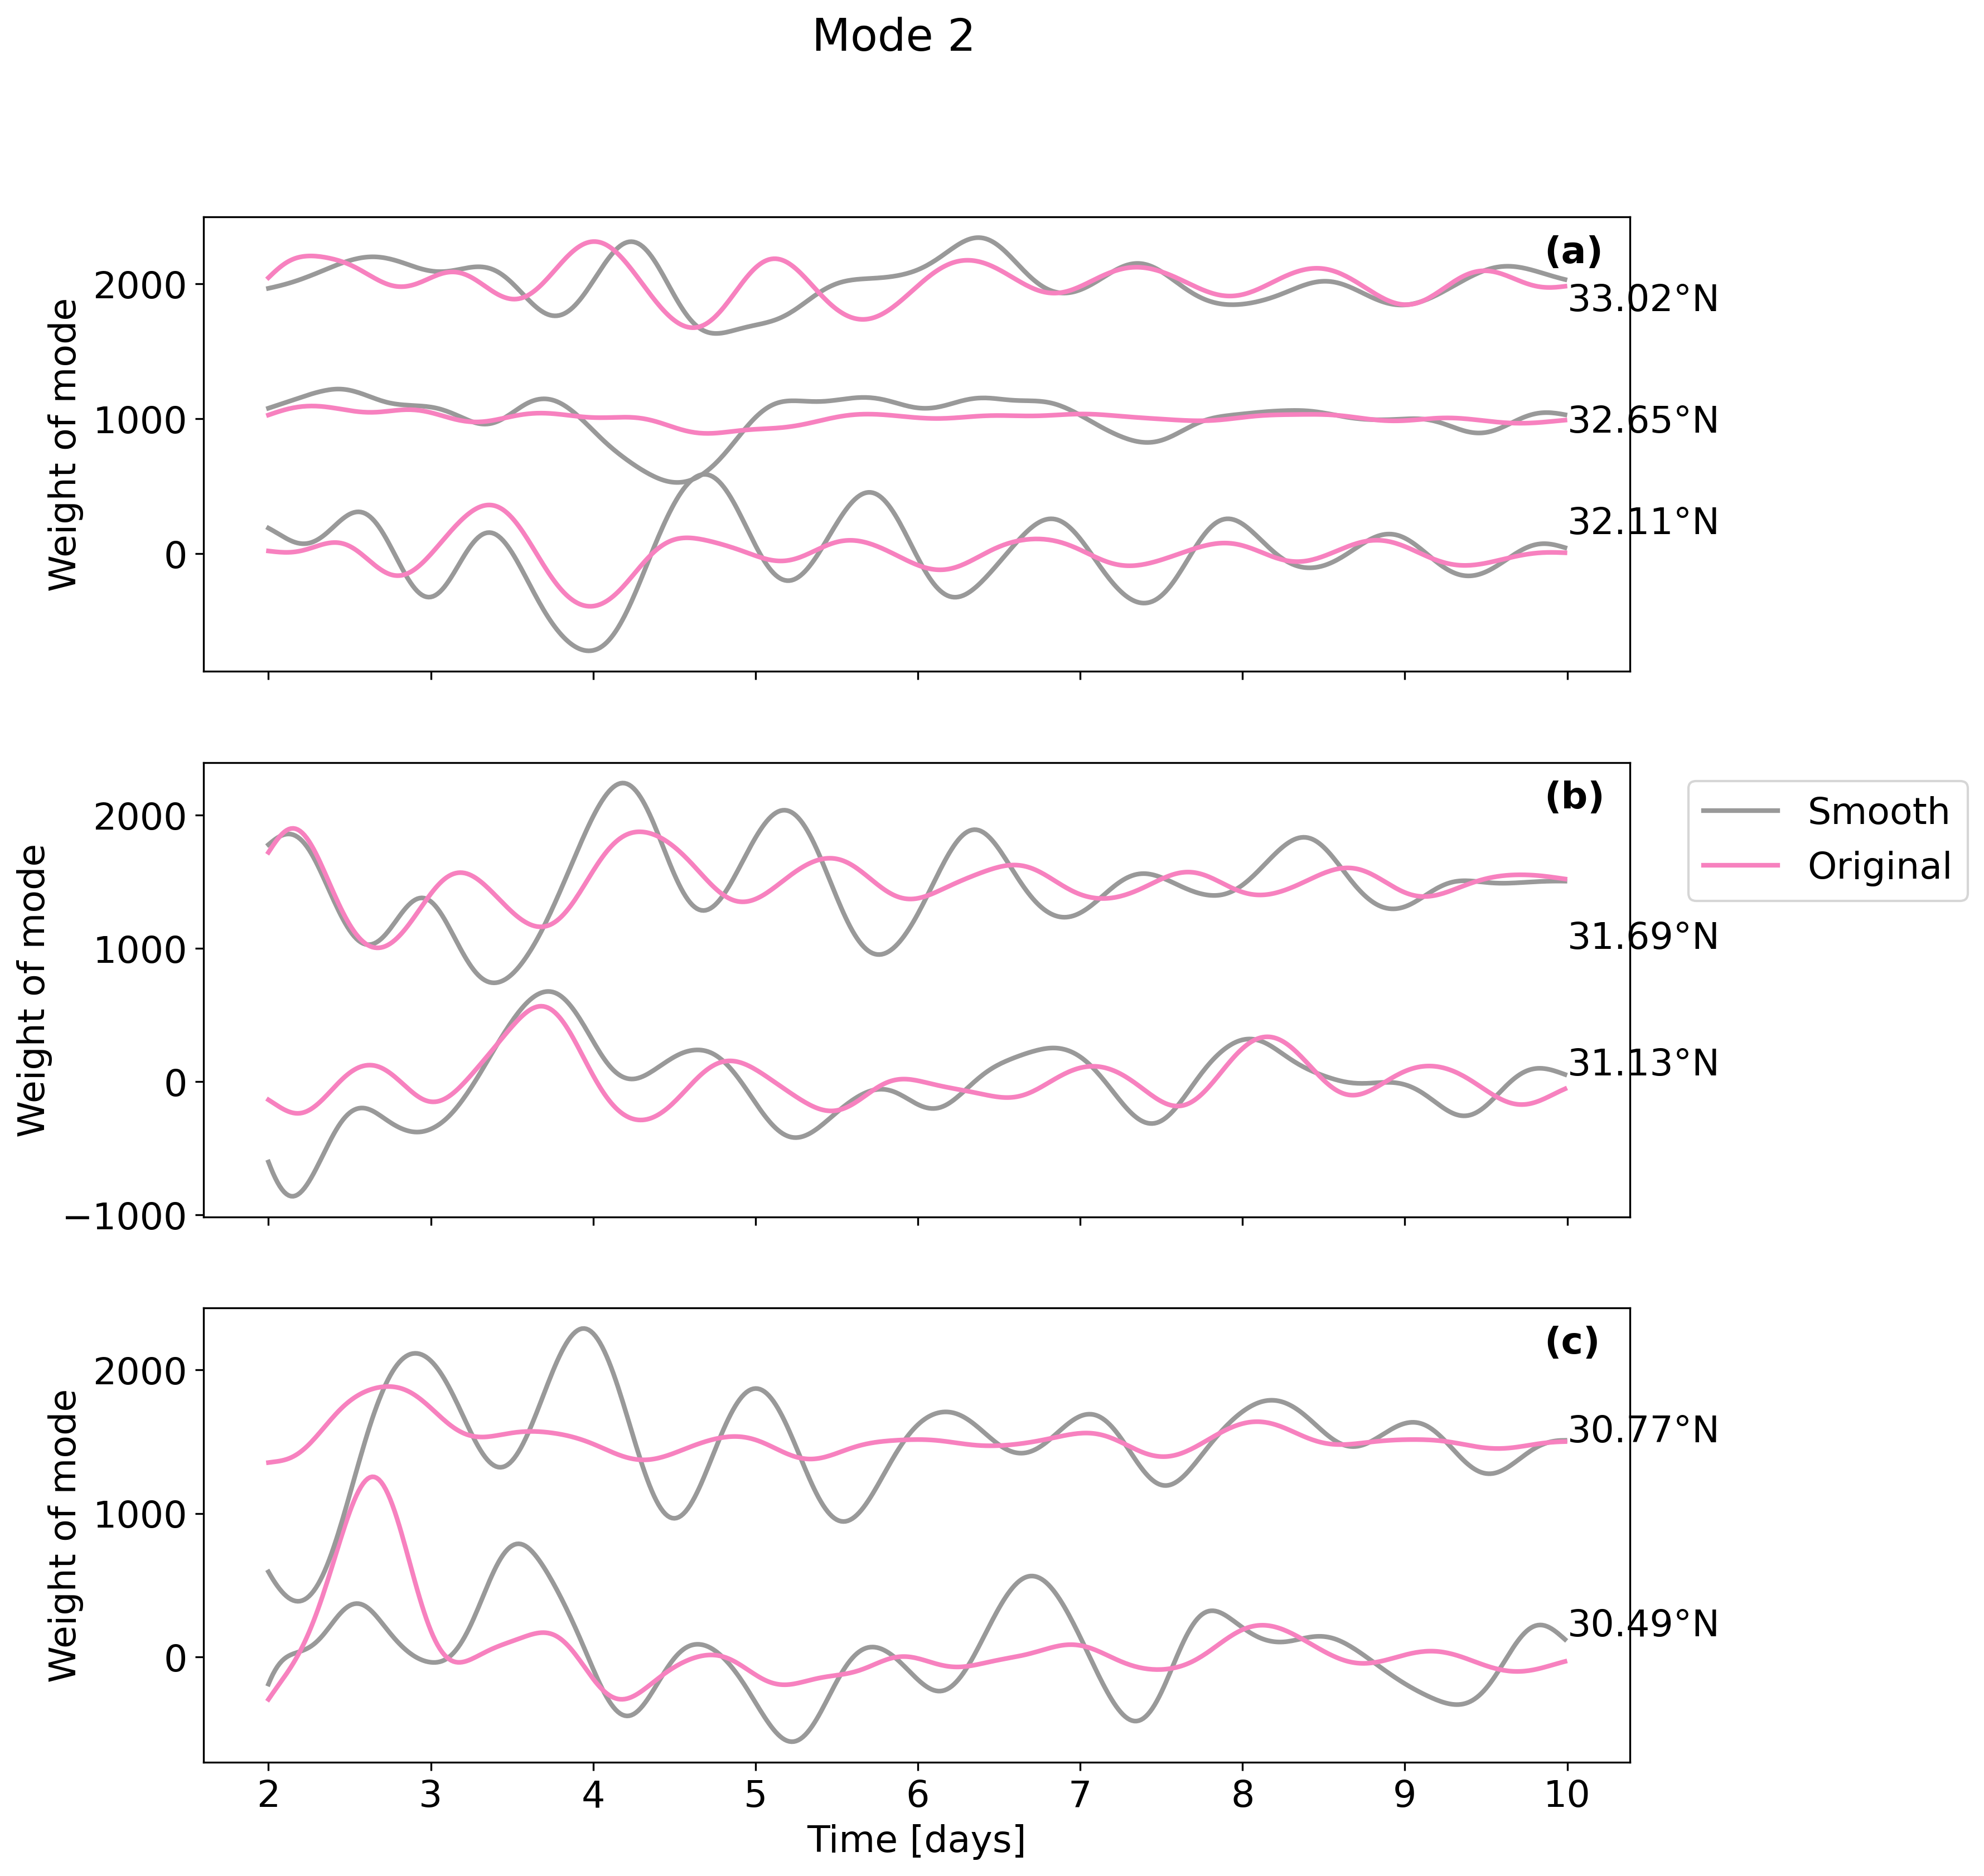

In [40]:
xlab='Time [days]'
ylab='Weight of mode'
p=3
colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(2,3,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),Bs[l+4][indexs,i], color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),B[l+4][:,i], color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),Bs[l+2][indexs,i], color=colors[p+1],linewidth=2)
                ax[1].plot(TIME/(60*24),B[l+2][:,i], color=colors[p],linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),Bs[l][indexs,i], color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),B[l][:,i], color=colors[p],linewidth=2)
        elif l==1:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(1000), color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(1000), color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),(Bs[l+2][indexs,i])+l*(1500), color=colors[p+1],label=f'Smooth', linewidth=2)
                ax[1].plot(TIME/(60*24),(B[l+2][:,i])+l*(1500), color=colors[p],label=f'Original', linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),(Bs[l][indexs,i])+l*(1500), color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),(B[l][:,i])+l*(1500), color=colors[p],linewidth=2)
        elif l==2:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(1000), color=colors[p+1], linewidth=2)  
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(1000), color=colors[p], linewidth=2) 
#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,150))
ax[0].annotate(str(corrinds[5])+'°N', (10,(900)))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*900)))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,50))
ax[1].annotate(str(corrinds[3])+'°N', (10,(1000)))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(ylabel=ylab)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off


ax[2].annotate(str(corrinds[0])+'°N', (10,150))
ax[2].annotate(str(corrinds[1])+'°N', (10,(1500)))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.25, 1))

plt.suptitle('Mode 2')
plt.show()


fig.tight_layout()


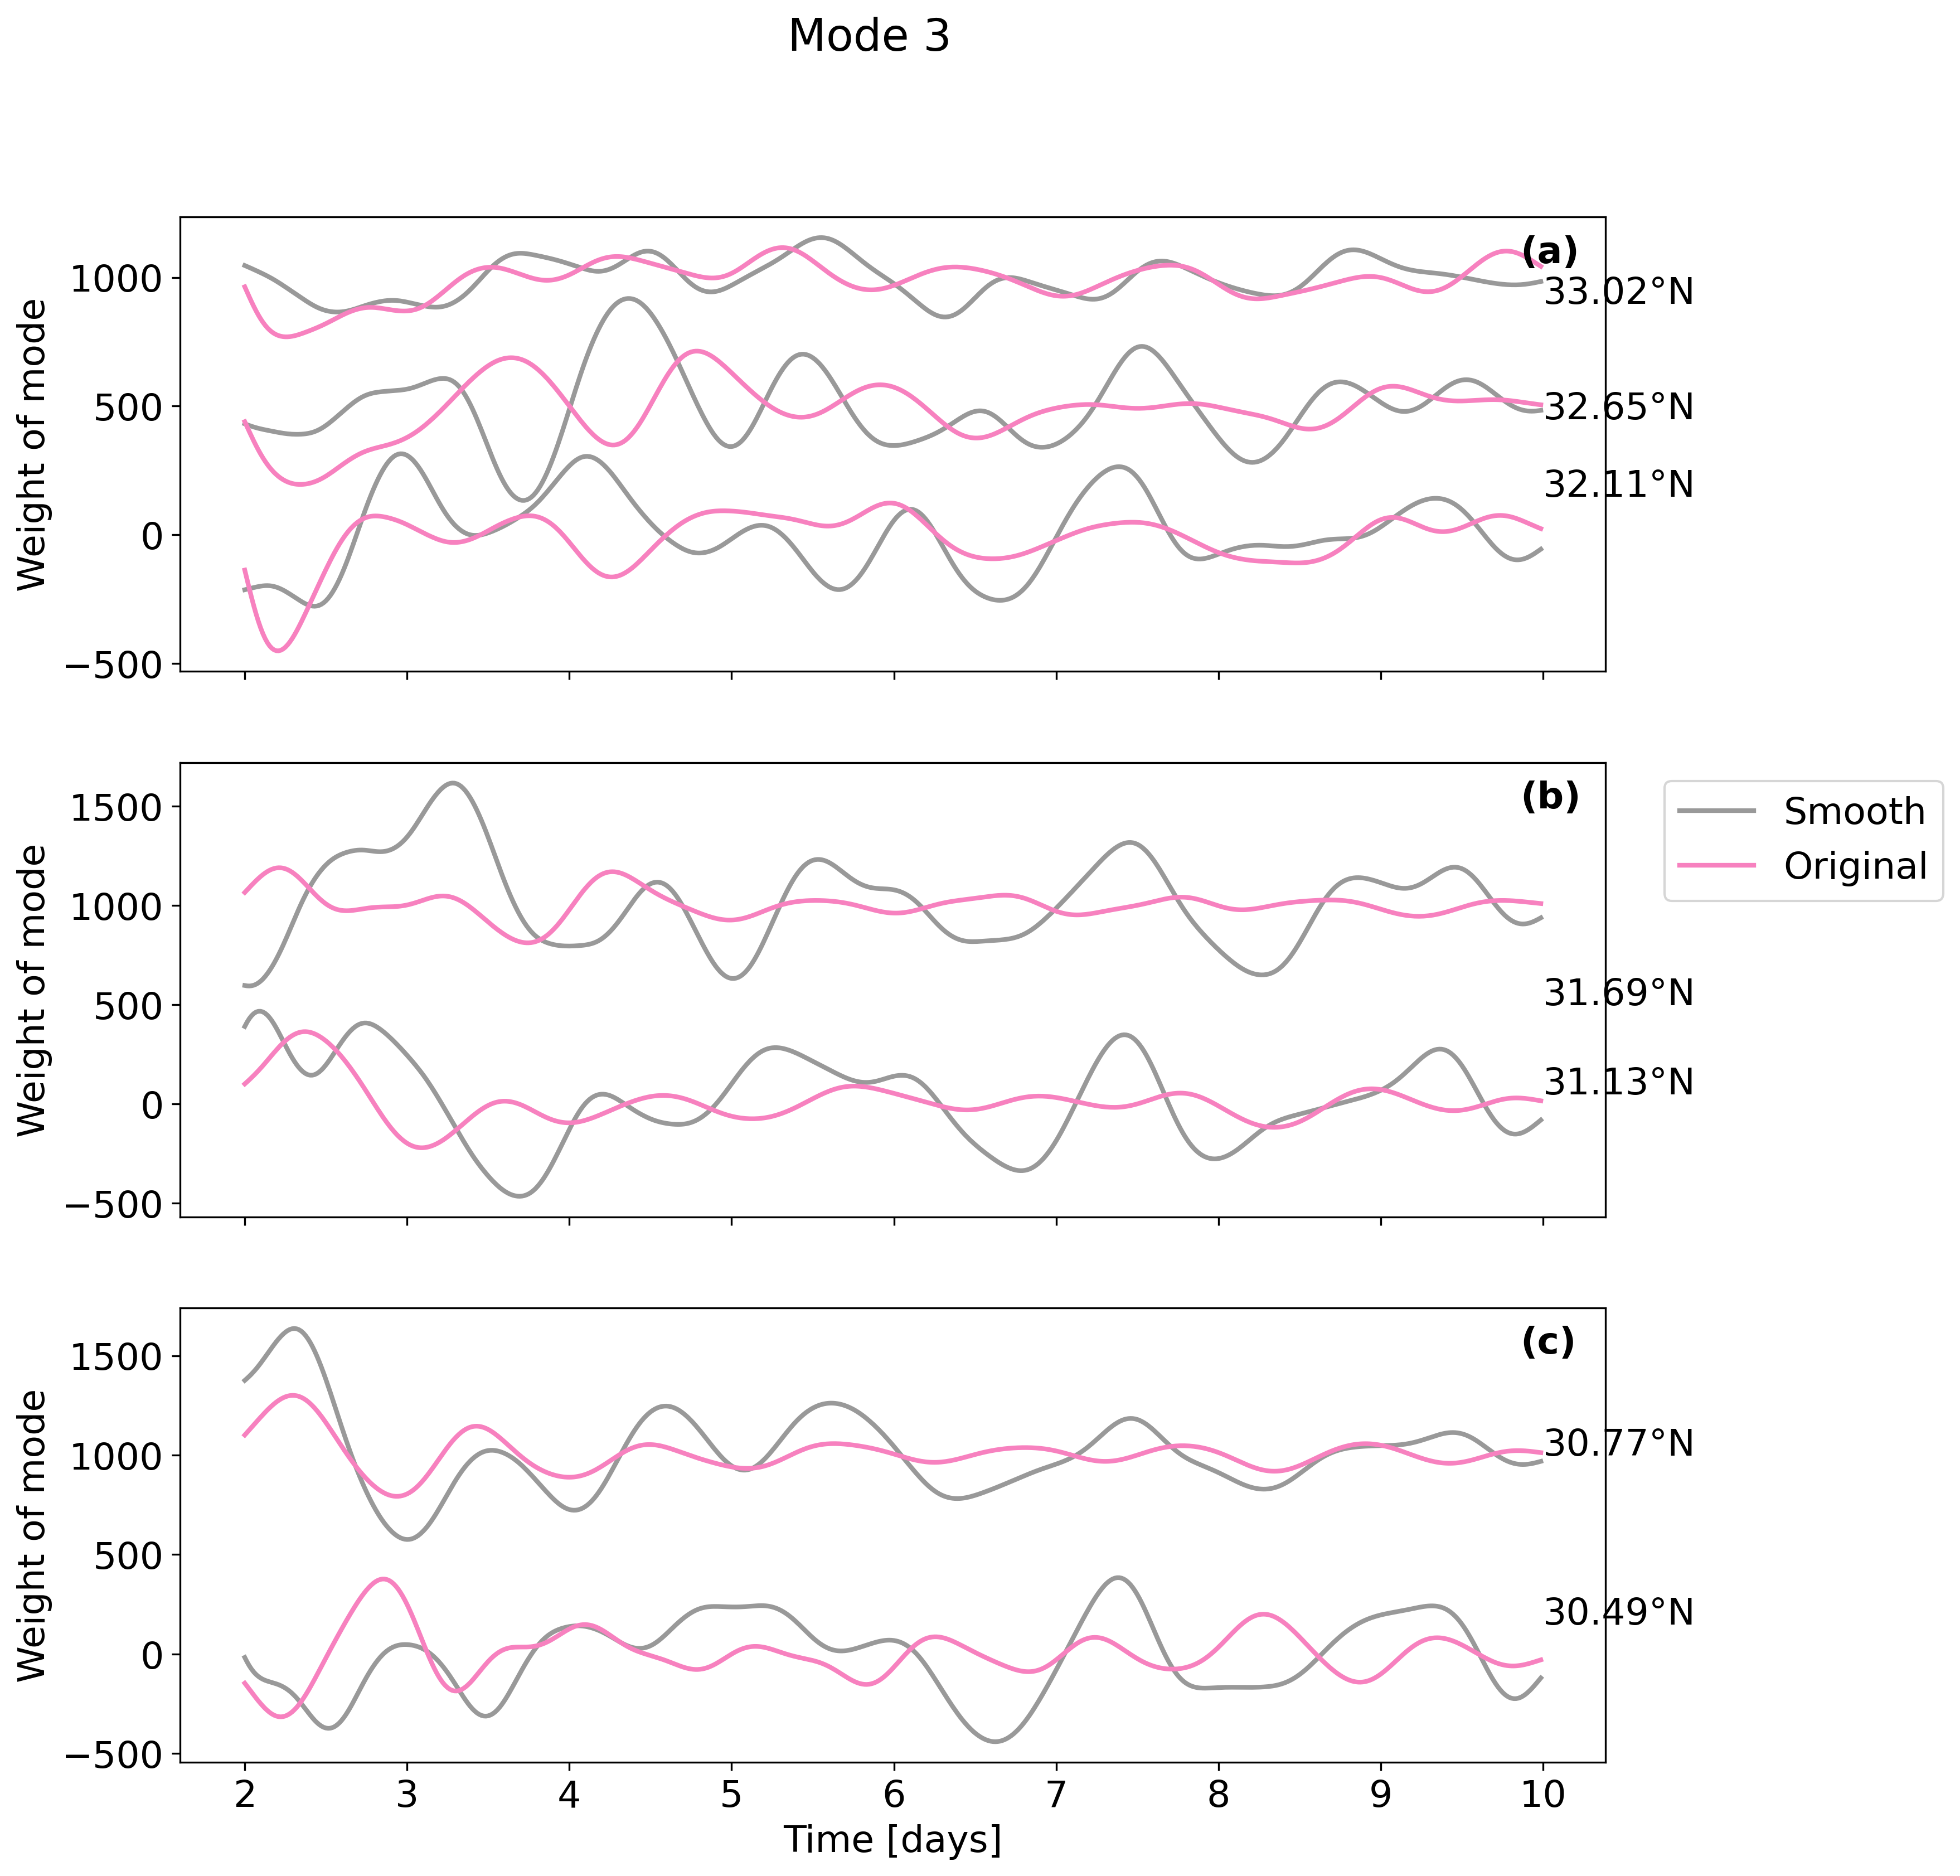

In [44]:
xlab='Time [days]'
ylab='Weight of mode'
p=3
colors=['#377eb8','#dede00','#ff7f00','#f781bf','#999999','#984ea3','tab:blue','#4daf4a', '#a65628', '#e41a1c','#4daf4a','tab:red','tab:brown','tab:orange','tab:pink','tab:green']
fig,ax=plt.subplots(3)
for i in np.arange(3,4,1):
    for l in np.arange(0,3,1):
        
        if l==0:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),Bs[l+4][indexs,i], color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),B[l+4][:,i], color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),Bs[l+2][indexs,i], color=colors[p+1],linewidth=2)
                ax[1].plot(TIME/(60*24),B[l+2][:,i], color=colors[p],linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),Bs[l][indexs,i], color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),B[l][:,i], color=colors[p],linewidth=2)
        elif l==1:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(500), color=colors[p+1],linewidth=2)
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(500), color=colors[p],linewidth=2)
            if np.all(B[l+2][:,i]!=0):
                ax[1].plot(TIME/(60*24),(Bs[l+2][indexs,i])+l*(1000), color=colors[p+1],label=f'Smooth', linewidth=2)
                ax[1].plot(TIME/(60*24),(B[l+2][:,i])+l*(1000), color=colors[p],label=f'Original', linewidth=2)
            if np.all(B[l][:,i]!=0):
                ax[2].plot(TIME/(60*24),(Bs[l][indexs,i])+l*(1000), color=colors[p+1],linewidth=2)
                ax[2].plot(TIME/(60*24),(B[l][:,i])+l*(1000), color=colors[p],linewidth=2)
        elif l==2:
            if np.all(B[l+4][:,i]!=0):
                ax[0].plot(TIME/(60*24),(Bs[l+4][indexs,i])+l*(500), color=colors[p+1], linewidth=2)  
                ax[0].plot(TIME/(60*24),(B[l+4][:,i])+l*(500), color=colors[p], linewidth=2) 
#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (10,150))
ax[0].annotate(str(corrinds[5])+'°N', (10,(450)))
ax[0].annotate(str(corrinds[6])+'°N', (10,(2*450)))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (10,50))
ax[1].annotate(str(corrinds[3])+'°N', (10,(500)))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(ylabel=ylab)
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) #label along bottom is off


ax[2].annotate(str(corrinds[0])+'°N', (10,150))
ax[2].annotate(str(corrinds[1])+'°N', (10,(1000)))
ax[2].text(0.94, 0.9, '(c)', fontweight='bold', color='k', 
            transform=ax[2].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.25, 1))

plt.suptitle('Mode 3')
plt.show()


fig.tight_layout()


In [ ]:

----------------------------------------------------------------------------------------
ik=0
b=ds[ik].betas.values

dsORG=xr.open_dataset('Locations/' + str(var) + str(corrinds[ik]) + str(filt)+ '.nc')

matfile=loadmat('BT_P.mat')
indXlon,indYlat=matfile['indexXlon'][ik],matfile['indexYlat'][ik]
	
dirw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01b_SVB_febTS/'
dirn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01b_noSVB_febTS/'

dsw,dsn=SVBfunc.loadNetCDFs(dirw,dirn,'PHIHYD')
hFacC = dsw[0].hFacC

hfa = np.ma.masked_values(hFacC, 0)
maskin = np.ma.getmask(hfa)
mask=maskin[:,indYlat,indXlon]

x=dsORG.x.values
z=dsORG.z.values

bcheck=np.sum(b,axis=1)

val=dsORG.VAL2.values
grid_Z=ds[ik].gridZ.values
zind=np.where(np.logical_and(mask==False,grid_Z<=-250))[0][0]
xind=np.where(np.logical_and(mask==False,grid_Z<=-250))[1][1]

plt.contourf(x,z,np.ma.masked_array(val[0],mask=mask))
plt.scatter(x[xind],z[zind],s=20)
plt.show()

expb=math.floor(math.log(abs(np.mean(bcheck)), 10))
expv=math.floor(math.log(abs(np.mean(val[:,zind,xind])), 10))

plt.plot(val[:,zind,xind],'r')
plt.plot((bcheck/(10**expb))*(10**expv),'b')

----------------------------------------------------------------------------------------

for i in np.arange(1,6,1):
    fig,ax=plt.subplots()
    for k in range(len(ds)):
    	if np.all(B[k][:,i]!=0):
        	ax.plot(TIME/(60*24),B[k][:,i]+k*25**2, color=colors[k-1],linewidth=2)
        	ax.annotate(str(corrinds[k])+'°N', (9.2,k*25**2))
    ax.set(xlabel=xlab, ylabel=ylab)
        
    for l in np.arange(0,3,1):
        
        if l==0:
            if len(betas3[l][0,:])>i:
                ax[0].plot(TIME/(60*24),betas3[l][:,i], color=colors[i-1],linewidth=2)
            if len(betas2[l][0,:])>i:
                ax[1].plot(TIME/(60*24),betas2[l][:,i], color=colors[i-1],linewidth=2)
            if len(betas[l][0,:])>i:
                ax[2].plot(TIME/(60*24),betas[l][:,i], color=colors[i-1], linewidth=2)
        elif l==1:
            if len(betas3[l][0,:])>i:
                ax[0].plot(TIME/(60*24),betas3[l][:,i]+l*(50**(exp3)), color=colors[i-1], linewidth=2)            
            if len(betas2[l][0,:])>i:
                ax[1].plot(TIME/(60*24),betas2[l][:,i]+l*(50**(exp2)), color=colors[i-1], linewidth=2)
            if len(betas[l][0,:])>i:
                ax[2].plot(TIME/(60*24),betas[l][:,i]+l*(50**(exp1)), color=colors[i-1], label=f'Mode {i-1}', linewidth=2)
        elif l==2:
            if len(betas3[l][0,:])>i:
                ax[0].plot(TIME/(60*24),betas3[l][:,i]+l*(50**(exp3)), color=colors[i-1], linewidth=2)  

#plt.set(xlabel='Time (hrs)', ylabel='Mode nr')
#ax[0].legend()
ax[0].annotate(str(corrinds[4])+'°N', (9.2,180))
ax[0].annotate(str(corrinds[5])+'°N', (9.2,(50**(exp3))))
ax[0].annotate(str(corrinds[6])+'°N', (9.2,(2*50**(exp3))))
ax[0].set( ylabel=ylab)
ax[0].text(0.94, 0.9, '(a)', fontweight='bold', color='k', 
            transform=ax[0].transAxes)

#ax[0].legend(bbox_to_anchor=(1.25, 0.2))
ax[1].annotate(str(corrinds[2])+'°N', (1.8,180))
ax[1].annotate(str(corrinds[3])+'°N', (1.8,(50**(exp2))))
ax[1].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[1].set(xlabel=xlab, ylabel=ylab)

ax[2].annotate(str(corrinds[0])+'°N', (1.8,180))
ax[2].annotate(str(corrinds[1])+'°N', (1.8,(40**(exp1))))
ax[2].text(0.94, 0.9, '(b)', fontweight='bold', color='k', 
            transform=ax[1].transAxes)
ax[2].set(xlabel=xlab, ylabel=ylab)

#ax[1].axvline(x = 4.35, color = 'k',linestyle='dashed')
#ax[1].axvline(x = 3.7, color = 'k',linestyle='dashed', label = 'Marker for 32.68°N')

#ax[1].axvline(x = 4.6, color = 'k')
#ax[1].axvline(x = 4, color = 'k', label = 'Marker for 32.98°N')
ax[1].legend(bbox_to_anchor=(1.1, 1.45))


